In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from collections import Counter
import seaborn as sns

In [2]:

#for enabling altair plotting
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
from scipy.stats import linregress

In [4]:
df=pd.read_csv('C:/Users/abrar/Desktop/2019/Data/master.csv')

In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
df.columns=['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per100k', 'country-year','HDI_for_year',
       'gdp_for_year', 'gdp_per_capita', 'generation']

In [7]:
df['hdina']=np.nan
    
    # Replace missing hdi with country mean
df['HDI_for_year'] = df.HDI_for_year.fillna(df.groupby(["country"])["HDI_for_year"].transform(np.mean))
    
    # Leave as 0, this will work well with tree based models.
df['HDI_for_year'] = np.where(df.HDI_for_year.isna(), 0, df.HDI_for_year)

In [8]:
# Filter countries
keep_countries = ['Russian Federation', 'United States', 
                      'Japan', 'France', 'Ukraine',
                      'Germany', 'Republic of Korea', 
                      'Brazil', 'Poland', 'United Kingdom']
#keep_countries = ['France']
#keep_countries = ['United Arab Emirates']
#keep_countries = ['Australia']

df = df[df['country'].isin(keep_countries)]

In [9]:
 # Map age
age_mapping = {'5-14 years':0,
               '15-24 years':1,
               '25-34 years':2,
               '35-54 years':3,
               '55-74 years':4,
               '75+ years':5}
    
df['age_grp'] = df.age.map(age_mapping).astype(np.object)
    
    # Create dummies
  #  df = pd.concat([df, pd.get_dummies(df[["sex", "generation", "country", "age_grp"]])], axis=1)

In [10]:
#gdp_for_year is object due to commas which  replace to get our float values
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(float)

# Now imputing the regions according to the country name

In [11]:
#reading excel sheet
Country_Region=pd.read_excel('C:/Users/abrar/Desktop/2019/Data/Countrey-Region.xlsx')

In [12]:
#checking the data set
Country_Region.head()

,country,country_code,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,Unnamed: 10
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [13]:
#including only the relevant columns in the new dataframe
new = Country_Region[['country', 'country_code', 'country-code','region']].copy()

In [14]:
#checking the new formed dataframe
new.head()

,country,country_code,country-code,region
0,Afghanistan,AF,AFG,ISO 3166-2:AF
1,Åland Islands,AX,ALA,ISO 3166-2:AX
2,Albania,AL,ALB,ISO 3166-2:AL
3,Algeria,DZ,DZA,ISO 3166-2:DZ
4,American Samoa,AS,ASM,ISO 3166-2:AS


In [15]:
#merging our original data frame with this new data frame according to country name
df=df.merge(new,on='country',how='left')

In [16]:

#checking the data frame
df.head()

,country,year,sex,age,suicides_no,population,suicides_per100k,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,hdina,age_grp,country_code,country-code,region
0,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,2.229428e+11,1898,G.I. Generation,NaN,5,BR,BRA,ISO 3166-2:BR
1,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,2.229428e+11,1898,G.I. Generation,NaN,4,BR,BRA,ISO 3166-2:BR
2,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,2.229428e+11,1898,Silent,NaN,3,BR,BRA,ISO 3166-2:BR
3,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,2.229428e+11,1898,Boomers,NaN,2,BR,BRA,ISO 3166-2:BR
4,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,2.229428e+11,1898,Generation X,NaN,1,BR,BRA,ISO 3166-2:BR


In [17]:
#checking percentage of null value in each column
df.isna().sum()* 100 / len(df)

country               0.0
year                  0.0
sex                   0.0
age                   0.0
suicides_no           0.0
population            0.0
suicides_per100k      0.0
country-year          0.0
HDI_for_year          0.0
gdp_for_year          0.0
gdp_per_capita        0.0
generation            0.0
hdina               100.0
age_grp               0.0
country_code          0.0
country-code          0.0
region                0.0
dtype: float64

In [18]:
#reading this excel sheet to include the column called unemployment index
indicator=pd.read_excel('C:/Users/abrar/Desktop/2019/Data/Fatures_enginering/WDIEXCEL.xlsx')

In [19]:

#checking the data frame
indicator.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN


In [20]:
#keeping only rows relevant for unemployment index
indicator=indicator[indicator['Indicator Code']=='SL.UEM.TOTL.NE.ZS']

In [21]:
df['unemployment_index']=np.nan

In [22]:
df.shape[0]

3480

In [23]:
for i in range(df.shape[0]):
    code=df.loc[i, 'country-code']
    year=df.loc[i, 'year']
    a=indicator[indicator['Country Code']==code][str(int(year))].values
    df.loc[i,'unemployment_index']=a[0]


In [24]:

#grouping our data frame wrt country
gp=df.groupby('country')

In [25]:
#finding the mean unemployment index country wise
tempo=gp.mean()['unemployment_index']

In [26]:

#creating a data frame of the fetched values
df_tempo=pd.DataFrame({'country':tempo.keys(),'unemployment_index':tempo.values})

In [27]:
#for reference checking the order of merging
df.merge(df_tempo,on='country',how='left').head()

,country,year,sex,age,suicides_no,population,suicides_per100k,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,hdina,age_grp,country_code,country-code,region,unemployment_index_x,unemployment_index_y
0,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,2.229428e+11,1898,G.I. Generation,NaN,5,BR,BRA,ISO 3166-2:BR,3.38,7.153505
1,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,2.229428e+11,1898,G.I. Generation,NaN,4,BR,BRA,ISO 3166-2:BR,3.38,7.153505
2,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,2.229428e+11,1898,Silent,NaN,3,BR,BRA,ISO 3166-2:BR,3.38,7.153505
3,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,2.229428e+11,1898,Boomers,NaN,2,BR,BRA,ISO 3166-2:BR,3.38,7.153505
4,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,2.229428e+11,1898,Generation X,NaN,1,BR,BRA,ISO 3166-2:BR,3.38,7.153505


In [28]:
#actual merging of the average of the unemployment index
df['unemployment_index']=df['unemployment_index'].fillna(df.merge(df_tempo,on='country',how='left')['unemployment_index_y'])

In [29]:
#column showing null values
df[df['unemployment_index'].isna()]['country-code'].unique()

array([], dtype=object)

In [30]:
l=['CPV', 'DMA', 'KIR', 'OMN', 'CHE']
for each in l:
    s=indicator[indicator['Country Code'] == each]
    c=0
    val=0
    for j in range(1960,2019):
        a=s[str(int(j))]
        if not np.isnan(a.values[0]):
            c+=1
            val+=a.values[0]
    val=val/c
    print(each,val,c)
    n=df[df['country-code']==each].index
    for i in n:
        df.loc[i, 'unemployment_index']=val

CPV 19.305675029754624 4
DMA 14.134000015258797 5
KIR 22.6149997711182 2
OMN 3.705888271331785 2
CHE 2.1167875118553643 24


In [31]:
#Final check for the nulls
df.isna().sum()* 100 / len(df)

country                 0.0
year                    0.0
sex                     0.0
age                     0.0
suicides_no             0.0
population              0.0
suicides_per100k        0.0
country-year            0.0
HDI_for_year            0.0
gdp_for_year            0.0
gdp_per_capita          0.0
generation              0.0
hdina                 100.0
age_grp                 0.0
country_code            0.0
country-code            0.0
region                  0.0
unemployment_index      0.0
dtype: float64

In [32]:
#df=df.drop(['hdina'],axis=1)
df['age'],age=pd.factorize(df['age'])
df.head()

,country,year,sex,age,suicides_no,population,suicides_per100k,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation,hdina,age_grp,country_code,country-code,region,unemployment_index
0,Brazil,1985,male,0,129,840300,15.35,Brazil1985,0.576,2.229428e+11,1898,G.I. Generation,NaN,5,BR,BRA,ISO 3166-2:BR,3.38
1,Brazil,1985,male,1,535,5364900,9.97,Brazil1985,0.576,2.229428e+11,1898,G.I. Generation,NaN,4,BR,BRA,ISO 3166-2:BR,3.38
2,Brazil,1985,male,2,1011,11986300,8.43,Brazil1985,0.576,2.229428e+11,1898,Silent,NaN,3,BR,BRA,ISO 3166-2:BR,3.38
3,Brazil,1985,male,3,791,10762900,7.35,Brazil1985,0.576,2.229428e+11,1898,Boomers,NaN,2,BR,BRA,ISO 3166-2:BR,3.38
4,Brazil,1985,male,4,661,13834000,4.78,Brazil1985,0.576,2.229428e+11,1898,Generation X,NaN,1,BR,BRA,ISO 3166-2:BR,3.38


In [33]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per100k', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'hdina', 'age_grp', 'country_code',
       'country-code', 'region', 'unemployment_index'],
      dtype='object')

In [34]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics


In [35]:
 # Create dummies
df = pd.concat([df, pd.get_dummies(df[["sex", "generation", "country", "age_grp"]])], axis=1)

# log transformation 

In [36]:
df['log_suicides'] =  np.log1p(df.suicides_no)
df['suicides_rates'] =np.log1p(df.suicides_per100k)
df['log_population'] =  np.log(df.population)
df['log_gdp_for_year'] =  np.log(df.gdp_for_year)
df['log_HDI_for_year'] = np.log(df.HDI_for_year)
df['log_unemployment_index'] = np.log(df.unemployment_index)
df['suicide_x_pop'] = df.suicides_no / df.population

C:\Users\abrar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [37]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import altair as alt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import sklearn as sk
from math import sqrt
import warnings


In [38]:

%R library(lme4)

UsageError: Line magic function `%R` not found.


In [39]:
""""
(ggplot(df, aes(x='year', y='log_suicides', color='year')) +
 geom_jitter(alpha=0.2, height=0, width=0.2) + 
 geom_smooth(method='rlm')
)
"""

'"\n(ggplot(df, aes(x=\'year\', y=\'log_suicides\', color=\'year\')) +\n geom_jitter(alpha=0.2, height=0, width=0.2) + \n geom_smooth(method=\'rlm\')\n)\n'

# Train/Test Split
 use the 7 most recent years as test data. This number of years totals a number of observations close to 25% / 30% of the total data.

In [38]:
predictors = ['year', 'log_population', 'log_gdp_for_year', 'log_unemployment_index','country_Brazil', 'sex_female',
              'sex_male', 'country_France', 'country_Germany', 'country_Japan', 'country_Poland',
              'country_Republic of Korea', 'country_Russian Federation',
              'country_Ukraine', 'country_United Kingdom', 'country_United States',
              'age_grp_0', 'age_grp_1', 'age_grp_2', 'age_grp_3', 'age_grp_4', 'age_grp_5']

In [39]:
test_years = [2015, 2014, 2013, 2012, 2011, 2010, 2009]

# Stats models use this data.frames
df_train = df[~df.year.isin(test_years)]
df_test = df[df.year.isin(test_years)]

In [43]:
# Used for SVR
X = df[predictors]
y = df.suicides_rates

In [44]:
X_train = X[~X.year.isin(test_years)]
X_test = X[X.year.isin(test_years)]

y_train = y[~X.year.isin(test_years)]
y_test = y[X.year.isin(test_years)]

In [45]:
print("Train Rows: {}, Test Rows: {}, Nbr of predictors: {}".format(X_train.shape[0], X_test.shape[0], len(predictors)))

Train Rows: 2664, Test Rows: 816, Nbr of predictors: 22


# Model 1: log_suicides ~ year

In [46]:
# Train model on training data
mod = smf.ols(formula='suicides_rates ~ year', data=df_train)
res_lr = mod.fit()

# predictions in all data
df['est_log_suicides'] = res_lr.predict(df[['year']])
df['est_suicide_nbr'] = np.expm1(df.est_log_suicides)
df_test = df[df.year.isin(test_years)]
print(res_lr.summary())

                            OLS Regression Results                            
Dep. Variable:         suicides_rates   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4939
Date:                Sun, 24 Mar 2019   Prob (F-statistic):              0.482
Time:                        00:05:13   Log-Likelihood:                -4274.1
No. Observations:                2664   AIC:                             8552.
Df Residuals:                    2662   BIC:                             8564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5623      7.007     -0.366      0.7

C:\Users\abrar\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


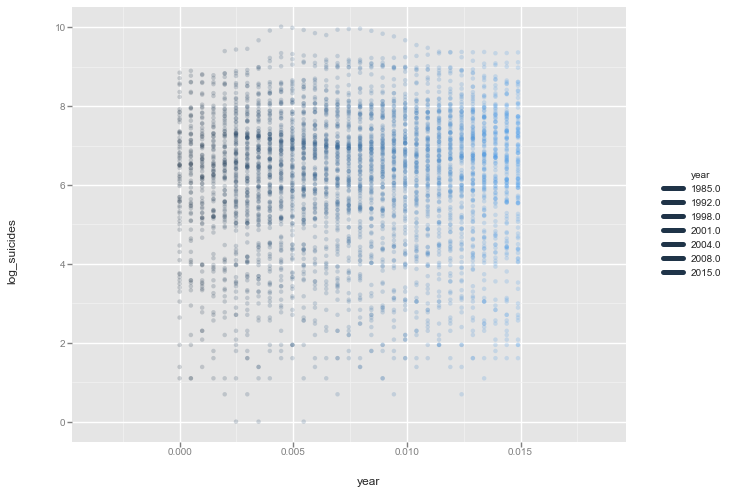

<ggplot: (144640077846)>

In [65]:
from ggplot import *
(ggplot(df, aes(x='year', y='log_suicides', color='year')) +
 geom_jitter(alpha=0.2, height=0, width=0.2) )

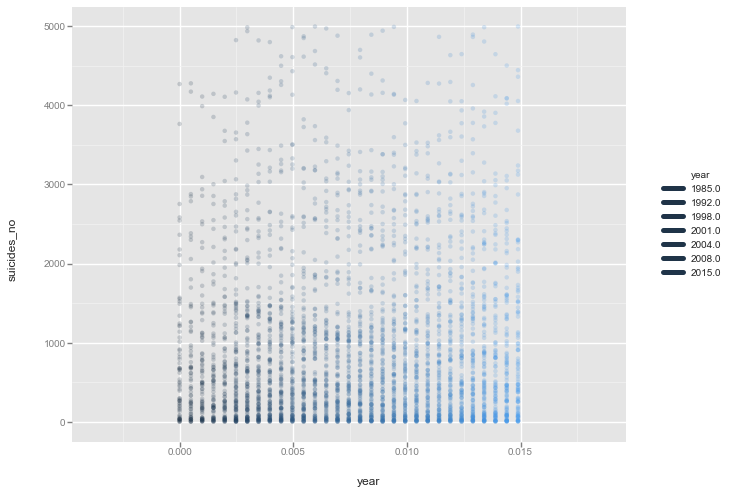

<ggplot: (144681160456)>

In [66]:
(ggplot(df[df.suicides_no < 5000], aes(x='year', y='suicides_no', color='year')) +
 geom_jitter(alpha=0.2, height=0, width=0.2)) 


# Model 2: log_suicides ~ year + log_population 

In [47]:
# Train model on training data
mod = smf.ols(formula='suicides_rates ~ year + log_population', data=df_train)
res_lr = mod.fit()

# Make predictions in all data
df['est_log_suicides'] = res_lr.predict(df)
df['est_suicide_nbr'] = np.expm1(df.est_log_suicides)
df_test = df[df.year.isin(test_years)]
print(res_lr.summary())

                            OLS Regression Results                            
Dep. Variable:         suicides_rates   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     30.08
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           1.21e-13
Time:                        00:05:41   Log-Likelihood:                -4244.6
No. Observations:                2664   AIC:                             8495.
Df Residuals:                    2661   BIC:                             8513.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2372      6.933     -0.

In [48]:
# Fit model on training data
mod = smf.ols(formula='suicides_rates ~ year  log_gdp_for_year +log_unemployment_index+ C(country) + C(sex) + C(age_grp)', data=df_train)
res_lr = mod.fit()

# Predictions in all variables
df['est_log_suicides'] = res_lr.predict(df)
df['est_suicide_nbr'] = np.expm1(df.est_log_suicides)
df['residuals'] = df.suicides_no- df.est_suicide_nbr
df_test = df[df.year.isin(test_years)]
print(res_lr.summary())

                            OLS Regression Results                            
Dep. Variable:         suicides_rates   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1305.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        00:06:12   Log-Likelihood:                -1158.1
No. Observations:                2664   AIC:                             2356.
Df Residuals:                    2644   BIC:                             2474.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [52]:
print_metrics(df_test)

Metrics in log-space:
RMSE log-space: 3.993
MAE log-space: 3.856

Metrics in original-scale:
RMSE original scale: 2361.984
MAE original scale: 1349.967


In [50]:
import numpy as np
import pandas as pd
import sklearn as sk
from math import sqrt
import warnings
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [51]:

def rmse(y, yhat):
    "Mean Squared Error"
    return np.sqrt(np.mean(np.square(y - yhat)))


def mae(y, yhat):
    "Mean Absolute Error"
    return np.mean(np.abs(y - yhat))


def print_metrics(df_test):
    print("Metrics in log-space:")
    print("RMSE log-space: {:0.3f}".format(rmse(df_test.log_suicides, df_test.est_log_suicides) ) )
    print("MAE log-space: {:0.3f}\n".format(mae(df_test.log_suicides, df_test.est_log_suicides) ) )

    print("Metrics in original-scale:")
    print("RMSE original scale: {:0.3f}".format(rmse(np.expm1(df_test.log_suicides), np.expm1(df_test.est_log_suicides) ) ) )
    print("MAE original scale: {:0.3f}".format(mae(np.expm1(df_test.log_suicides), np.expm1(df_test.est_log_suicides) ) ) )
    return None

In [53]:
gs = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,param_grid={"C": [1e0, 5, 1e1, 25, 50, 1e2],"gamma": np.logspace(-3, 3, 5)},verbose=1, n_jobs=-1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   43.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1.0, 5, 10.0, 25, 50, 100.0], 'gamma': array([1.00000e-03, 3.16228e-02, 1.00000e+00, 3.16228e+01, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [54]:
gs.best_estimator_

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
print("Cross-Validation R-Squared: {:0.3f}".format(gs.best_score_ ))

Cross-Validation R-Squared: 0.758


In [56]:
# Make predictions
df['est_log_suicides'] = gs.predict(X)
df['est_suicide_nbr'] = np.expm1(df.est_log_suicides)
df['residuals'] = df.suicides_no - df.est_suicide_nbr
df_test = df[df.year.isin(test_years)]

In [57]:
print_metrics(df_test)

Metrics in log-space:
RMSE log-space: 3.912
MAE log-space: 3.763

Metrics in original-scale:
RMSE original scale: 2360.712
MAE original scale: 1348.752


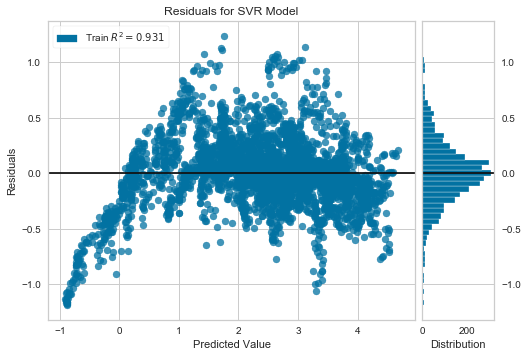

In [58]:
import yellowbrick
from yellowbrick.regressor import ResidualsPlot
from patsy import dmatrices, dmatrix

visualizer = ResidualsPlot(model = gs.best_estimator_)
visualizer.fit(X, y)  # Fit the training data to the model
visualizer.poof()  

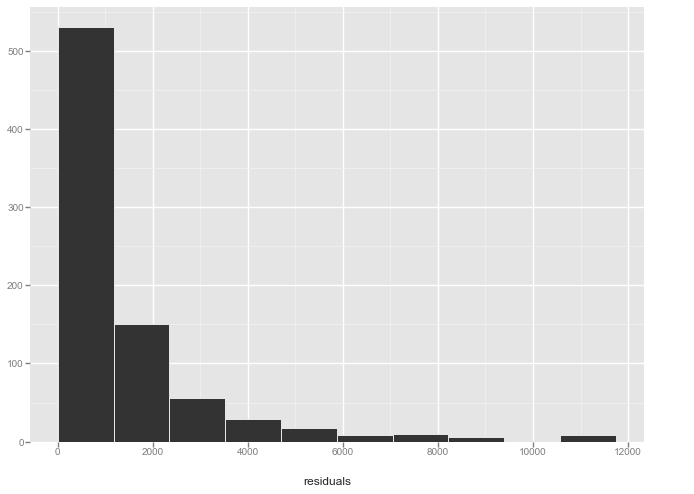

<ggplot: (-9223371892172179687)>

In [71]:
# Residuals plot - Test data
ggplot(df_test, aes(x="residuals")) + geom_histogram()

In [59]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(max_depth=8, random_state=0,n_estimators=100)
reg.fit(X_train, y_train)
pred=reg.predict(X_test)
print('R2= ', metrics.r2_score(y_test,pred))
print('MSE= ', metrics.mean_squared_error(y_test,pred))
print ('RMSE=',np.sqrt(metrics.mean_squared_error(y_test,pred)))
from sklearn.metrics import mean_absolute_error
print('MAE =', mean_absolute_error(y_test,pred))

R2=  0.9270120995736284
MSE=  0.09915516858655697
RMSE= 0.31488913697769405
MAE = 0.23739775236636668


In [60]:
# Make predictions
df['est_log_suicides'] = gs.predict(X)
df['est_suicide_nbr'] = np.expm1(df.est_log_suicides)
df['residuals'] = df.suicides_no - df.est_suicide_nbr
df_test = df[df.year.isin(test_years)]

In [61]:
print_metrics(df_test)

Metrics in log-space:
RMSE log-space: 3.994
MAE log-space: 3.858

Metrics in original-scale:
RMSE original scale: 2362.267
MAE original scale: 1350.096


In [62]:
import yellowbrick
from yellowbrick.regressor import ResidualsPlot
from patsy import dmatrices, dmatrix


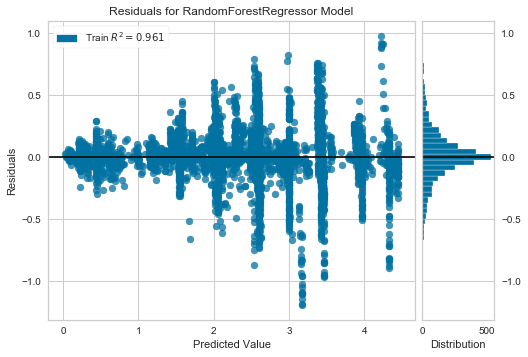

In [63]:
visualizer = ResidualsPlot(model = RandomForestRegressor(max_depth=8, random_state=0,n_estimators=100))
visualizer.fit(X, y)  # Fit the training data to the model
visualizer.poof()    

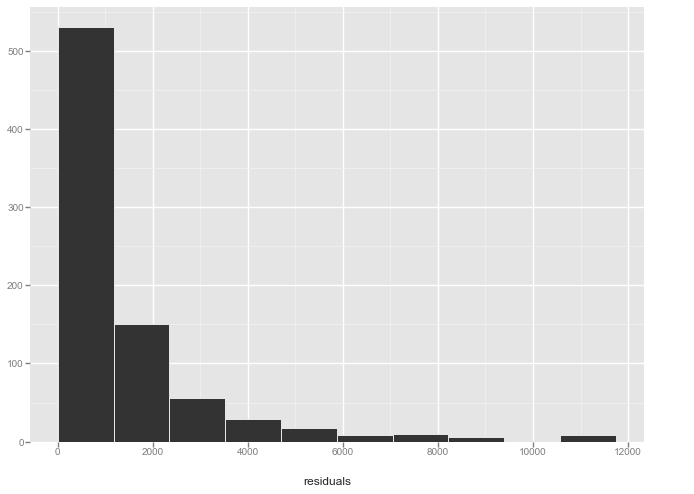

<ggplot: (-9223371892173654591)>

In [67]:
# Residuals plot - Test data
ggplot(df_test, aes(x="residuals")) + geom_histogram()

In [72]:
# Fit model on training data
mod = smf.mixedlm(formula='suicides_rates ~ year + log_population + log_gdp_for_year +C(country) + C(sex) + C(age_grp)+log_unemployment_index+C(generation)', data=df_train, groups=df_train['country'])
res_lr = mod.fit()

# Predictions in all variables
df['est_log_suicides'] = res_lr.predict(df)
df['est_suicide_nbr'] = np.expm1(df.est_log_suicides)
df['residuals'] = df.suicides_no - df.est_suicide_nbr
df_test = df[df.year.isin(test_years)]
print(res_lr.summary())

                    Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       suicides_rates
No. Observations:       2664          Method:                   REML          
No. Groups:             10            Scale:                    0.1402        
Min. group size:        204           Likelihood:               -1222.2398    
Max. group size:        288           Converged:                Yes           
Mean group size:        266.4                                                 
------------------------------------------------------------------------------
                                 Coef.    Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                         5.609       4.173  1.344 0.179 -2.570 13.788
C(country)[T.France]              0.958       0.532  1.803 0.071 -0.084  2.001
C(country)[T.Germany]             0.792       0.532  1.489 0.136 -0.250  

In [73]:

print_metrics(df_test)

Metrics in log-space:
RMSE log-space: 3.971
MAE log-space: 3.835

Metrics in original-scale:
RMSE original scale: 2361.668
MAE original scale: 1349.873
